# EXPERIMENTO 8: ASOCIACIÓN DE RESISTENCIAS

### Objetivo general:

El objetivo de esta práctica es conocer el comportamiento de la corriente
eléctrica en un circuito de resistencias en serie y paralelo, así como aplicar los cálculos de
resistencias en serie y paralelo.

### Código de colores en las resistencias.

![si](../images/colors.png)

Importando librerias necesarias.

In [1]:
from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt
import six
from pandas import DataFrame, read_csv as csv

Función para mostrar las tablas.

In [2]:
def table(
    data: DataFrame,
    colwidth: int | float = 3.0,
    rowheight: int | float = 0.625,
    fontsize: int | float = 14,
    headercolor: str = '#40466e',
    rowcolors: list[str] = None,
    edgecolor: str = 'w',
    bbox: list[int] = None,
    headercolumns: int = 0,
    ax = None,
    **kwargs
):
    if bbox is None:
        bbox = [0, 0, 1, 1]
    if rowcolors is None:
        rowcolors = ['#f1f1f2', 'w']
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([colwidth, rowheight])
        fig, ax = plt.subplots(figsize = size)
        ax.axis('off')

    mtable = ax.table(cellText = data.values, bbox = bbox, colLabels = data.columns, **kwargs)

    mtable.auto_set_font_size(False)
    mtable.set_fontsize(fontsize)

    for k, cell in six.iteritems(mtable.get_celld()):
        cell.set_edgecolor(edgecolor)
        if k[0] == 0 or k[1] < headercolumns:
            cell.set_text_props(weight = 'bold', color = 'w')
            cell.set_facecolor(headercolor)
        else:
            cell.set_facecolor(rowcolors[k[0] % len(rowcolors)])
    plt.show()

## PARTE PRESENCIAL

### Actividad 1: Determinar los valores de las resistencias según el codigo de colores.

Montage del experimento.

![set](../images/multimetro.jpg)

Creando un objeto de tipo DataFrame.

In [3]:
dfcolor = DataFrame(csv('../models/values.csv'))


Valores obtenidos en el laboratorio.

![set](../images/actividad1/Vectores.png)

Mostrando los valore de la tabla.

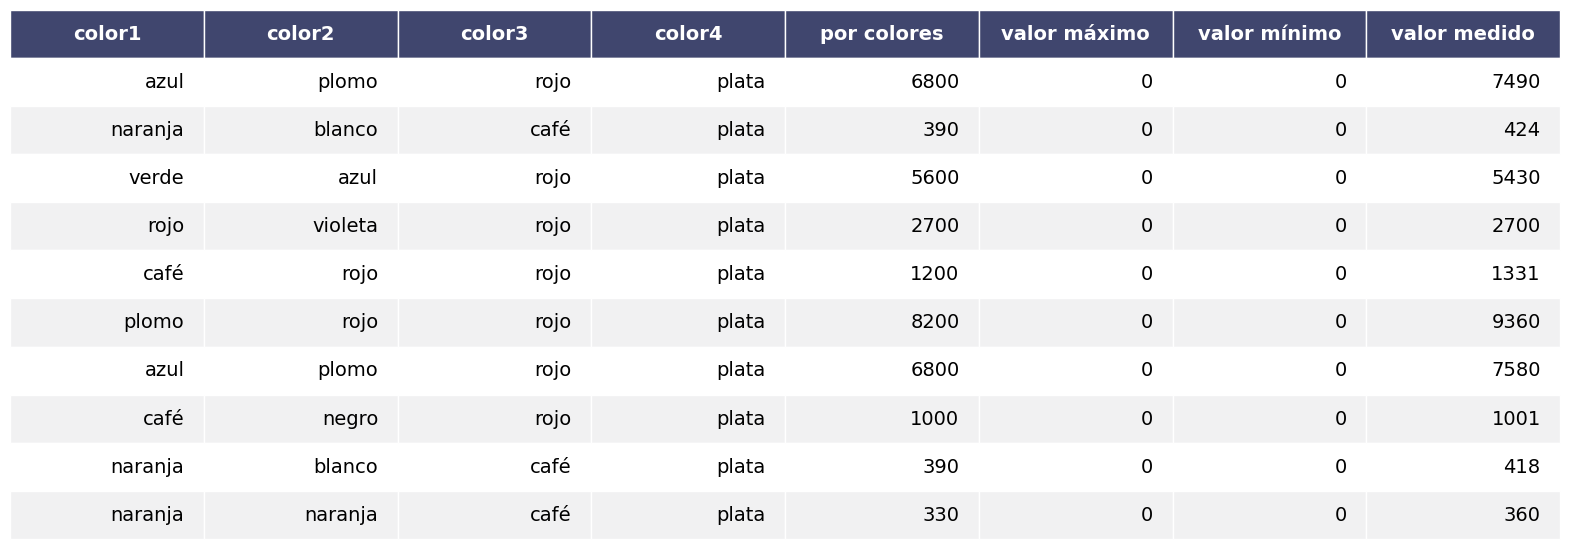

In [4]:
table(dfcolor, colwidth = 2.5)

Función para obtener un x% de un valor.

In [5]:
def getporcentage(value: int | float, porcentage: int | float):
    if 0 <= porcentage <= 100:
        return (value * porcentage) / 100
    else:
        raise ValueError(f'rango de porcentaje permitido 0 - 100: {porcentage}')

Para obtener los valores mínimos y máximos se determina mediante la regla de tres. Tolerancio de las resistencias es de $\pm$ 10%.

In [6]:
for i in range(len(dfcolor)):
    val = dfcolor.loc[i, 'por colores']
    dfcolor.loc[i, 'valor máximo'] = val + getporcentage(val, 10)

In [7]:
for i in range(len(dfcolor)):
    val = dfcolor.loc[i, 'por colores']
    dfcolor.loc[i, 'valor mínimo'] = val - getporcentage(val, 10)

Mostrando la tabla

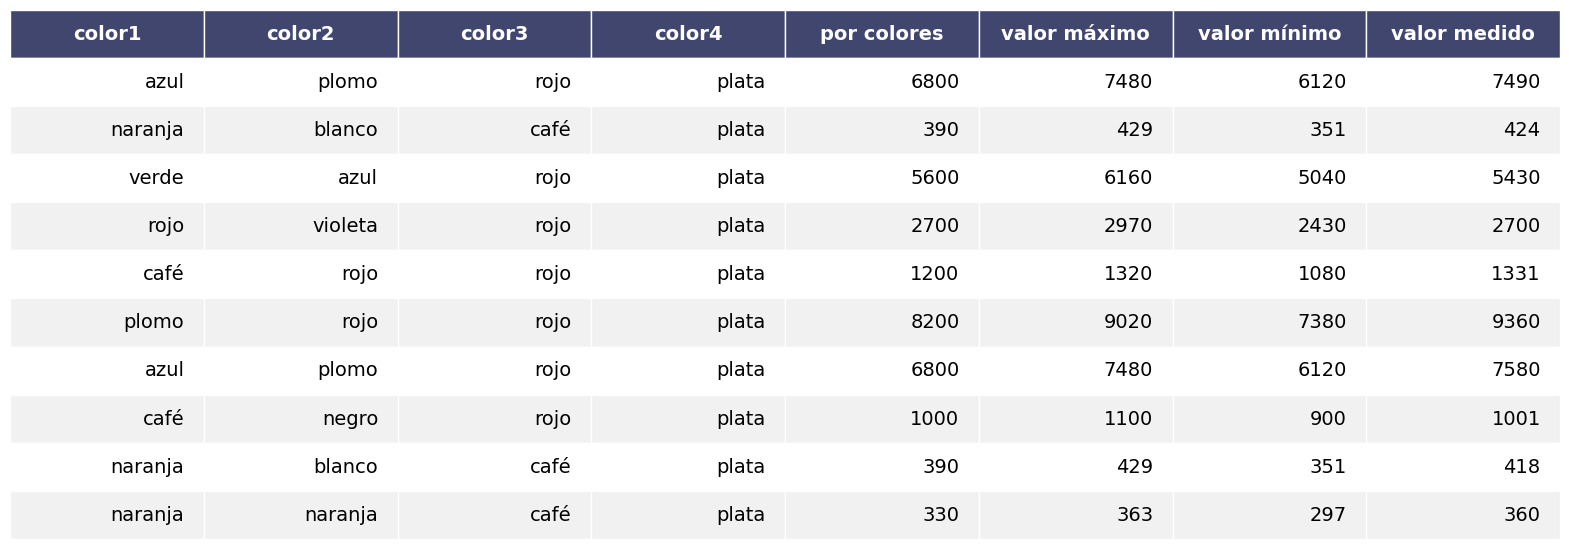

In [8]:
table(dfcolor, colwidth = 2.5)

## Actividad 2: Estudio de la ley de ohm.

Esquema de montaje.

![set](../images/multimetro-corriente.png)

Datos obtenidos en el laboratorio.

![set](../images/actividad2/Vectores.png)

Para una carga de $390\Omega$

Creando un objeto de tipo DataFrame.

In [9]:
dfohm = DataFrame(csv('../models/ohm.csv'))

Mostrando la tabla obtenida en el laboratorio.

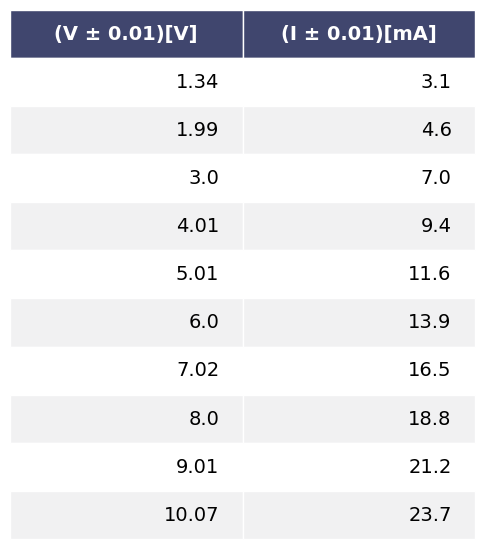

In [10]:
table(dfohm)

## Actividad 3: Asociación de las resistencias.

![set](../images/serie-paralelo.png)

Resistencia equivalente:
$$R_{eq} = m\Omega \pm n\Omega$$
Donde:
* $m$ valor total equivalente.
* $n$ tolerancia de la resistencia.

Procedimiento.
1) Armar el circuito.
2) Colocar la fuente de $9[V]$, verifcar con el multímetro.
3) Medir con el multímetro los voltages y corrientes en cada resistencia.
4) Anotar las medidas con su correspondiente error absoluto, así como los resultados.
5) Verificar los resultados experimetales con el cálculo teórico.

Configuración 1:
* valores de las resistencias medidos con el multímetro digital.

![set](../images/actividad3/configuracion-uno.png)

In [11]:
dfresistor1 = DataFrame(csv('../models/equivalente-uno.csv'))

Mostrando la tabla obtenida en el laboratorio.

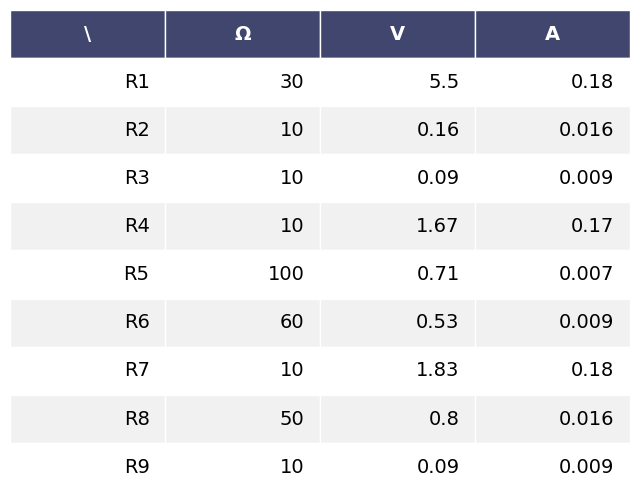

In [12]:
table(dfresistor1, colwidth = 2)

Configuración 2:
* valores de las resistencias medidos con el multímetro digital.

![set](../images/actividad3/configuracion-dos.png)

In [13]:
dfresistor2 = DataFrame(csv('../models/equivalente-dos.csv'))

Mostrando en la tabla obtenida en el laboratorio.

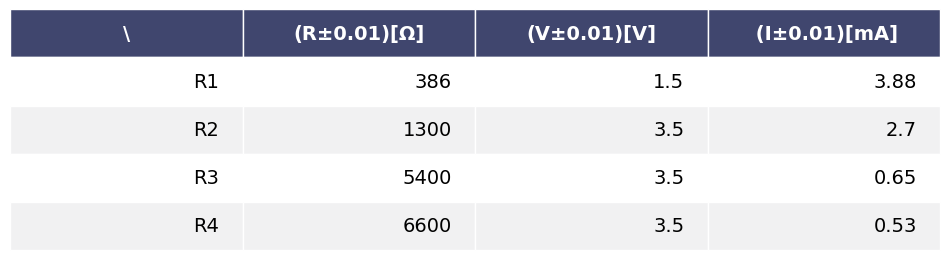

In [14]:
table(dfresistor2)

## PARTE VIRTUAL

* Utilizar la siguiente [simulación](https://phet.colorado.edu/sims/html/circuit-construction-kit-dc/latest/circuit-construction-kit-dc_es.html)

### Actividad 1: Estudio de asociación de resistencias

En la siguiente configuración calculamos con el simulador las corrientes y las caidas de tensiones en cada resistencia.

![set](../images/actividad4/Vectores.png)

In [15]:
DFS1 = DataFrame(csv('../models/eq-sim-uno.csv'))

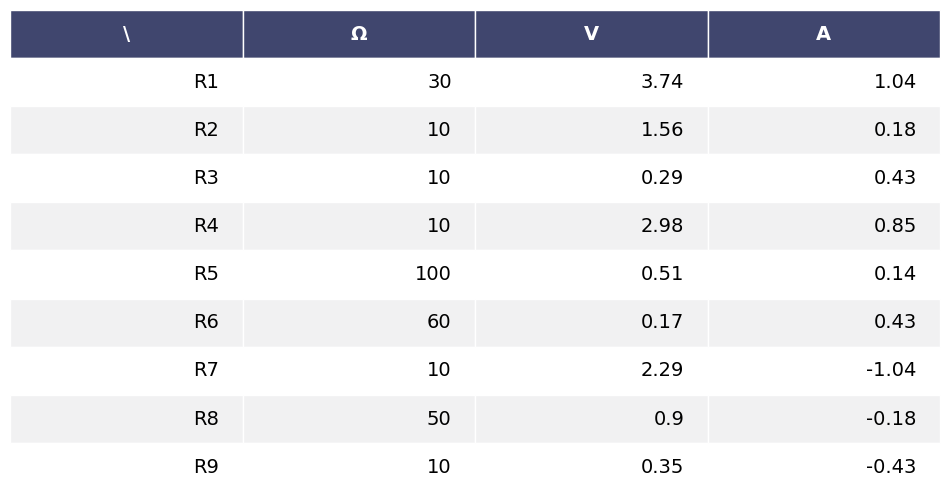

In [16]:
table(DFS1)

En el siguiente gráfico calculamos la corriente total que circula en el circuito con el simulador.

![set](../images/actividad4/equivalente1.png)

A través de la ley de ohm calculamos la resistencia equivalente
$$R_{eq} = \frac{V}{I}$$

In [17]:
R = 9/0.18
print(str(R) + 'Ω')

50.0Ω


Calculando la resistencia equivalente de forma analítica.

Configuración dos.

![set](../images/actividad5/Vectores.png)

In [18]:
DFS2 = DataFrame(csv('../models/eq-sim-dos.csv'))

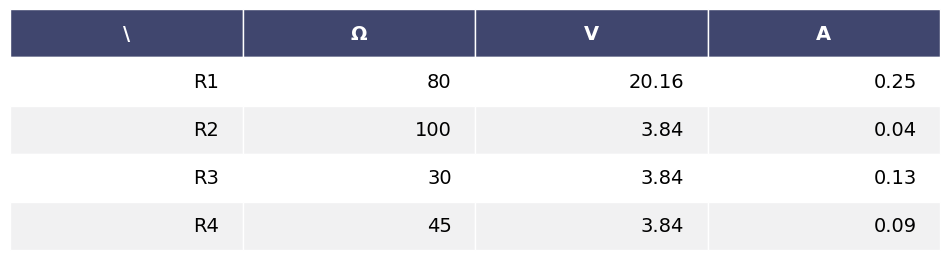

In [19]:
table(DFS2)

![set](../images/actividad5/equivalente2.png)

Calculando la resistencia equivalente.

In [20]:
R = 24/0.25
print(str(R) + 'Ω')

96.0Ω
